# Курсовой проект по анализу данных

## Основная часть

## 1) Поиск и выбор набора данных для построения моделей машинного обучения

В качестве набора данных мы будем использовать набор данных по исследованию предпринимательской компетентности студентов вуза - https://www.kaggle.com/namanmanchanda/entrepreneurial-competency-in-university-students

Набор данных был собран для исследовательских целей в 2019г.
Исследование состояло в том, чтобы понять основные черты того, что делает великого предпринимателя.

Датасет состоит из одного файла: data.csv

Файл содержит следующие колонки:

- EducationSector - инженерное образование или нет
- IndividualProject - студент делает личный проект или нет
- Age - возраст
- Gender - пол
- City - остаётся ли в городе
- Influenced - кто то влияет на студента или нет
- Perseverance - рейтинг студента по усидчивости
- DesireToTakeInitiative - рейтинг студента по желанию проявить инициативу
- Competitiveness - конкурентный рейтинг
- SelfReliance - рейтинг уверенности в себе
- StrongNeedToAchieve - сильная потребность достичь рейтинга цели
- SelfConfidence - рейтинг уверенности в себе
- GoodPhysicalHealth - оценка физического здоровья
- MentalDisorder - есть ли психическое расстройство
- KeyTraits	- ключевые черты студента
- ReasonsForLack - причина отсутствия культуры предпринимательства
- y - становится ли студент предпринимателем или нет (если студент стал предпринимателем, то 1, иначе 0)

In [19]:
#Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [20]:
#Загрузка данных
data = pd.read_csv('data/data.csv', sep=",")

## 2) Проведение разведочного анализа данных

In [21]:
# Первые 5 строк датасета
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [22]:
# Размер датасета
data.shape

(219, 17)

In [23]:
# Список колонок с типами данных
data.dtypes

EducationSector           object
IndividualProject         object
Age                        int64
Gender                    object
City                      object
Influenced                object
Perseverance               int64
DesireToTakeInitiative     int64
Competitiveness            int64
SelfReliance               int64
StrongNeedToAchieve        int64
SelfConfidence             int64
GoodPhysicalHealth         int64
MentalDisorder            object
KeyTraits                 object
ReasonsForLack            object
y                          int64
dtype: object

In [24]:
# Проверим наличие пустых значений
data.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [25]:
# Основные статистические характеристки набора данных
data.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [26]:
# уберем ненужный для нас параметр, чтобы он не помешал в будущем
data.drop(['ReasonsForLack'], axis = 1, inplace = True)

## Построение графиков, необходимых для понимания структуры данных

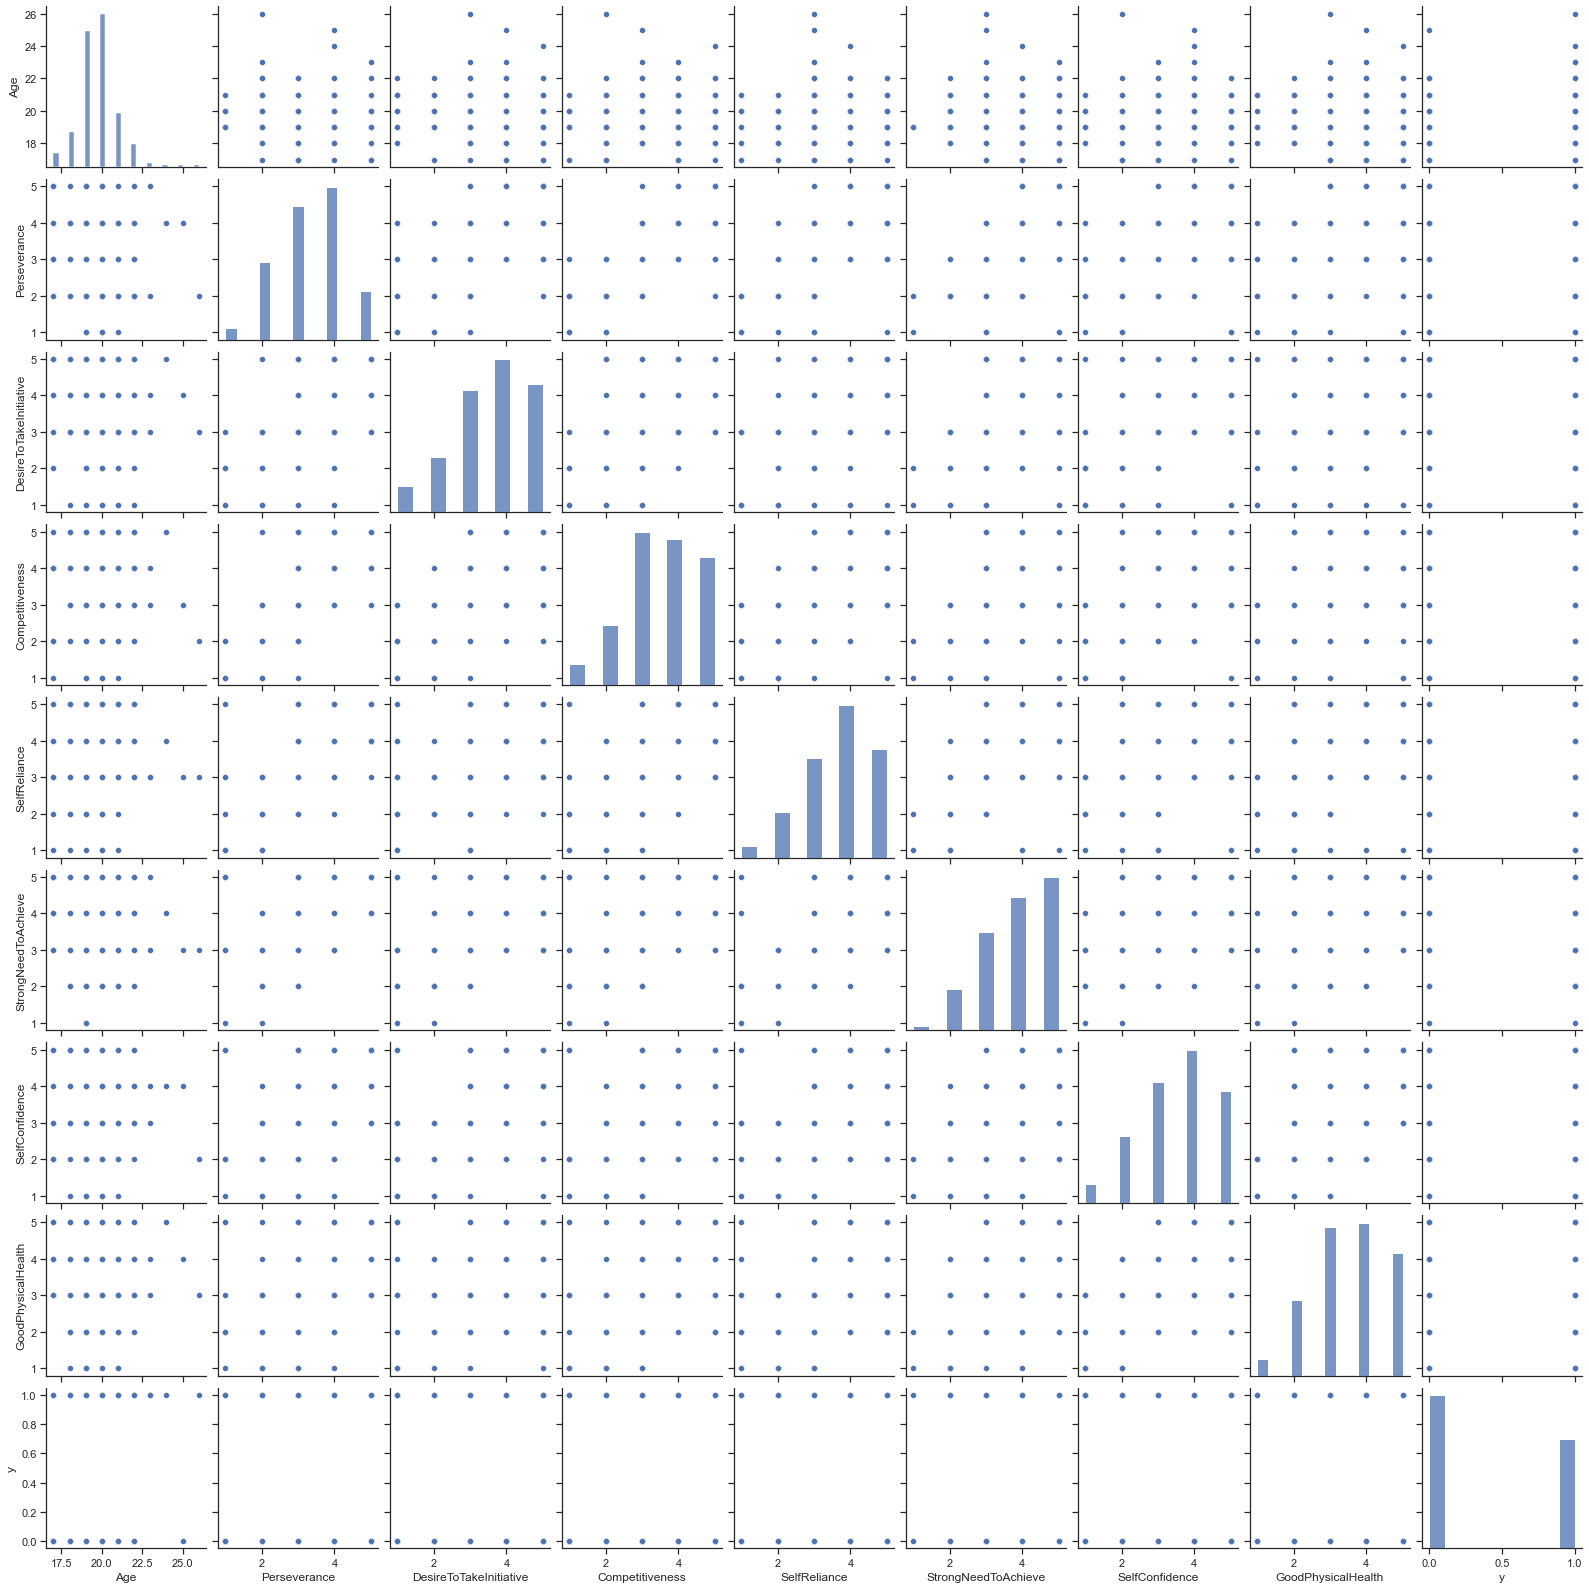

In [27]:
sns.pairplot(data)

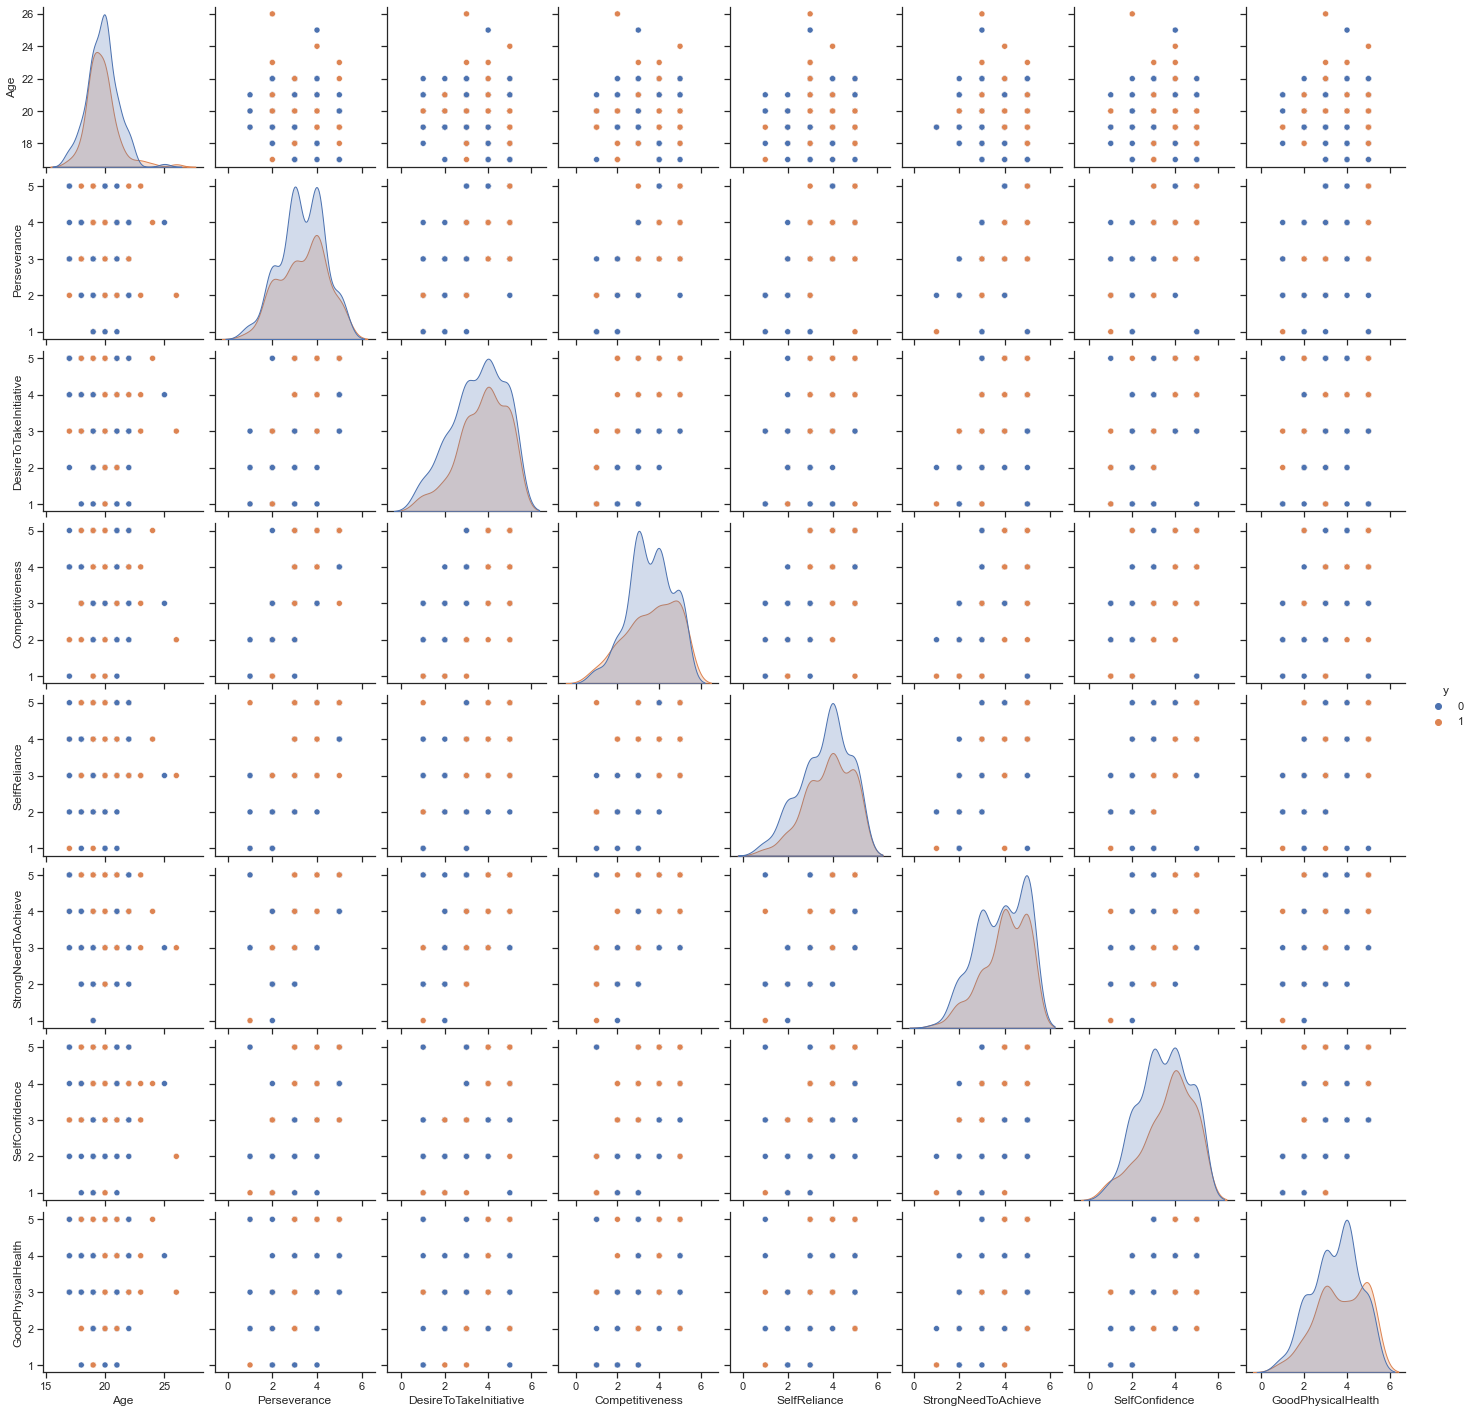

In [28]:
sns.pairplot(data, hue="y")

In [29]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['y'].unique()

array([1, 0], dtype=int64)

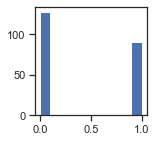

In [30]:
# Оценим дисбаланс классов для y
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['y'])
plt.show()

In [31]:
data['y'].value_counts()

0    128
1     91
Name: y, dtype: int64

In [32]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['y'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 58.45%, а класс 1 составляет 41.55%.


Вывод. Дисбаланс классов присутствует, но является приемлемым.

In [33]:
data.columns

Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits',
       'y'],
      dtype='object')

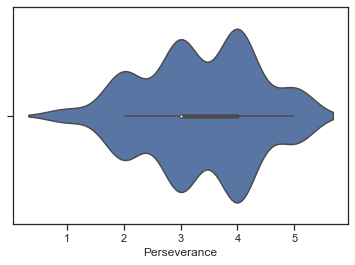

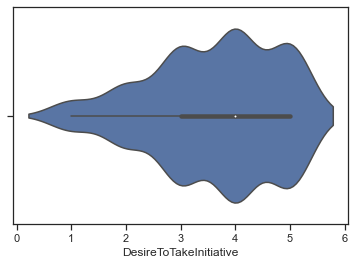

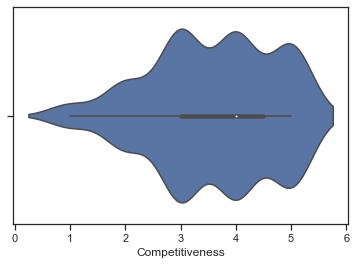

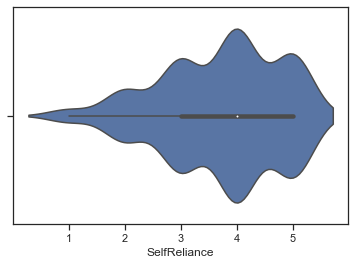

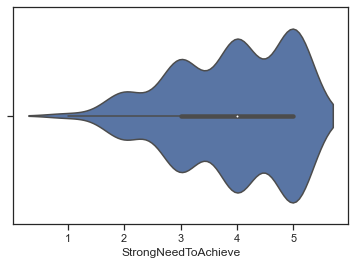

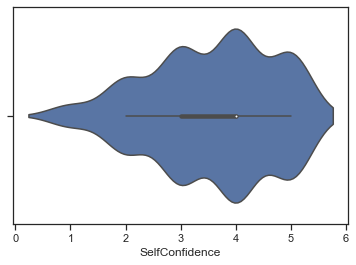

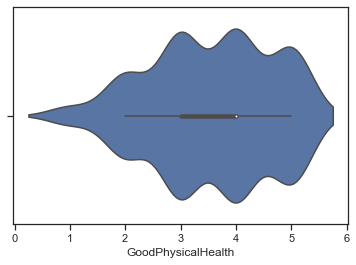

In [34]:
# Скрипичные диаграммы для числовых колонок
for col in ['Perseverance', 'DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth']:
    sns.violinplot(x=data[col])
    plt.show()

## 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей

In [35]:
data.dtypes

EducationSector           object
IndividualProject         object
Age                        int64
Gender                    object
City                      object
Influenced                object
Perseverance               int64
DesireToTakeInitiative     int64
Competitiveness            int64
SelfReliance               int64
StrongNeedToAchieve        int64
SelfConfidence             int64
GoodPhysicalHealth         int64
MentalDisorder            object
KeyTraits                 object
y                          int64
dtype: object

In [36]:
#Кодирование категориальных признаков
data['IndividualProject_le'] = data['IndividualProject'].map({'Yes': 1, 'No': 0})
data['Gender_le'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['City_le'] = data['City'].map({'Yes': 1, 'No': 0})
data['Influenced_le'] = data['Influenced'].map({'Yes': 1, 'No': 0})
data['MentalDisorder_le'] = data['MentalDisorder'].map({'Yes': 1, 'No': 0})

In [37]:
cat_temp_data = data[['EducationSector']]
cat_temp_data['EducationSector'].unique()

array(['Engineering Sciences', 'Others',
       'Economic Sciences, Business Studies, Commerce and Law',
       'Art, Music or Design', 'Humanities and Social Sciences',
       'Medicine, Health Sciences', 'Teaching Degree (e.g., B.Ed)',
       'Mathematics or Natural Sciences', 'Language and Cultural Studies'],
      dtype=object)

In [38]:
data['EducationSector_le'] = data['EducationSector'].map({'Engineering Sciences': 0, 'Others': 1,
       'Economic Sciences, Business Studies, Commerce and Law': 2,
       'Art, Music or Design': 3, 'Humanities and Social Sciences':4,
       'Medicine, Health Sciences':5, 'Teaching Degree (e.g., B.Ed)':6,
       'Mathematics or Natural Sciences':7, 'Language and Cultural Studies':8})

In [39]:
cat_temp_data = data[['KeyTraits']]
cat_temp_data['KeyTraits'].unique()

array(['Passion', 'Vision', 'Resilience', 'Positivity', 'Work Ethic'],
      dtype=object)

In [40]:
data['KeyTraits_le'] = data['KeyTraits'].map({'Passion':0, 'Vision':1, 'Resilience':2, 'Positivity':3, 'Work Ethic':4})

In [41]:
print(data.loc[:, ['IndividualProject_le','Gender_le','City_le','Influenced_le','MentalDisorder_le','EducationSector_le','KeyTraits_le']])

     IndividualProject_le  Gender_le  City_le  Influenced_le  \
0                       0          1        1              0   
1                       1          1        0              1   
2                       0          1        1              0   
3                       1          1        1              1   
4                       1          1        1              1   
..                    ...        ...      ...            ...   
214                     1          1        1              1   
215                     1          1        1              0   
216                     1          0        1              1   
217                     0          1        1              0   
218                     1          1        0              1   

     MentalDisorder_le  EducationSector_le  KeyTraits_le  
0                    1                   0             0  
1                    1                   0             1  
2                    0                   0            

Для построения моделей будем использовать все признак.
Категориальные признаки закодированы. 
Выполним масштабирование данных.

In [42]:
# Числовые колонки для масштабирования
scale_cols = ['EducationSector_le',
              'IndividualProject_le',
              'Age',
              'Gender_le',
              'City_le',
              'Influenced_le',
              'Perseverance',
              'DesireToTakeInitiative',
              'Competitiveness',
              'SelfReliance',
              'StrongNeedToAchieve',
              'SelfConfidence',
              'GoodPhysicalHealth',
              'MentalDisorder_le',
              'KeyTraits_le']

In [43]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [44]:
data[scale_cols].head()

,EducationSector_le,IndividualProject_le,Age,Gender_le,City_le,Influenced_le,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder_le,KeyTraits_le
0,0,0,19,1,1,0,2,2,3,3,2,2,3,1,0
1,0,1,22,1,0,1,3,3,3,4,4,3,4,1,1
2,0,0,18,1,1,0,3,4,3,3,3,4,4,0,0
3,0,1,20,1,1,1,3,3,3,3,4,3,3,0,2
4,0,1,19,1,1,1,2,3,3,3,4,3,2,1,1


In [45]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [46]:
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,...,Influenced_le_scaled,Perseverance_scaled,DesireToTakeInitiative_scaled,Competitiveness_scaled,SelfReliance_scaled,StrongNeedToAchieve_scaled,SelfConfidence_scaled,GoodPhysicalHealth_scaled,MentalDisorder_le_scaled,KeyTraits_le_scaled
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,...,0.0,0.25,0.25,0.5,0.50,0.25,0.25,0.50,1.0,0.00
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,...,1.0,0.50,0.50,0.5,0.75,0.75,0.50,0.75,1.0,0.25
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,...,0.0,0.50,0.75,0.5,0.50,0.50,0.75,0.75,0.0,0.00
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,...,1.0,0.50,0.50,0.5,0.50,0.75,0.50,0.50,0.0,0.50
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,...,1.0,0.25,0.50,0.5,0.50,0.75,0.50,0.25,1.0,0.25


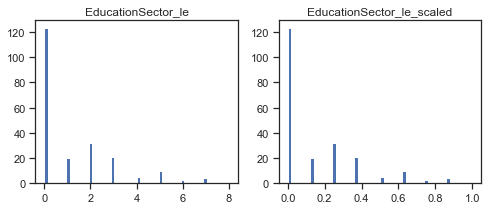

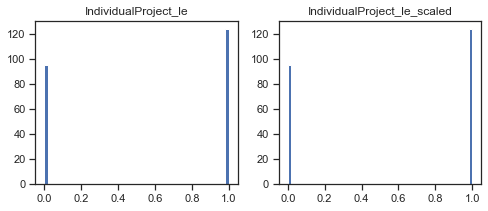

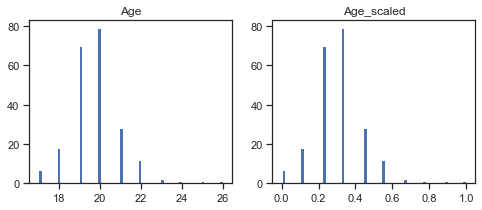

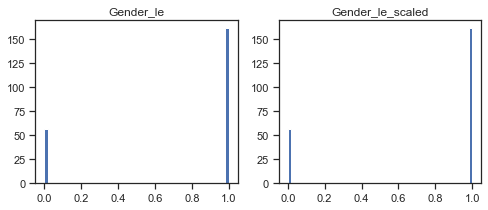

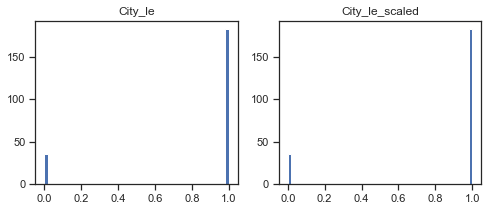

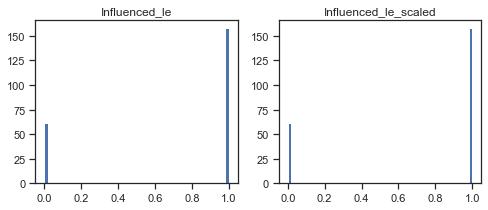

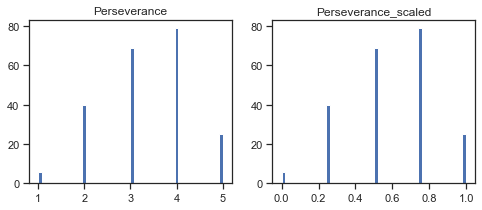

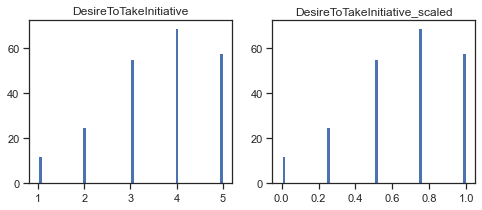

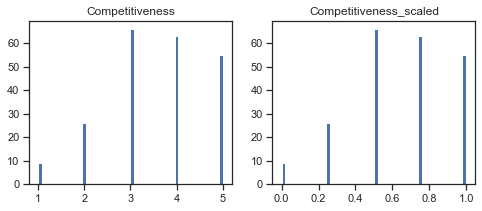

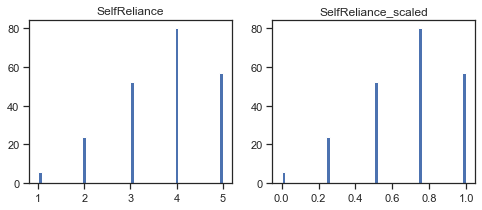

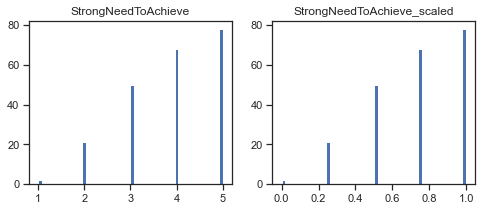

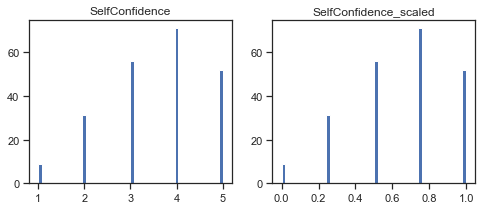

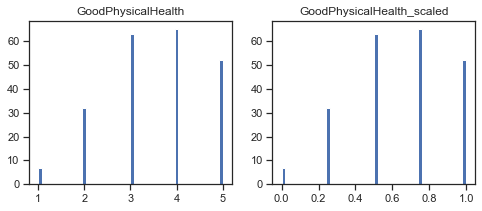

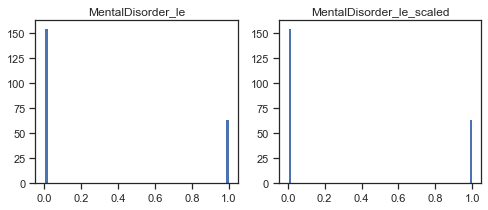

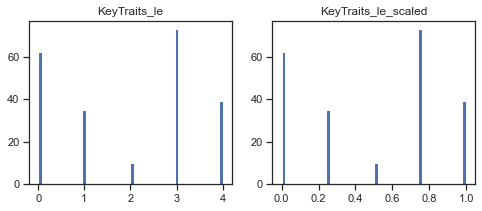

In [47]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения

In [48]:
corr_cols_1 = scale_cols + ['y']
corr_cols_1

['EducationSector_le',
 'IndividualProject_le',
 'Age',
 'Gender_le',
 'City_le',
 'Influenced_le',
 'Perseverance',
 'DesireToTakeInitiative',
 'Competitiveness',
 'SelfReliance',
 'StrongNeedToAchieve',
 'SelfConfidence',
 'GoodPhysicalHealth',
 'MentalDisorder_le',
 'KeyTraits_le',
 'y']

In [49]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['y']
corr_cols_2

['EducationSector_le_scaled',
 'IndividualProject_le_scaled',
 'Age_scaled',
 'Gender_le_scaled',
 'City_le_scaled',
 'Influenced_le_scaled',
 'Perseverance_scaled',
 'DesireToTakeInitiative_scaled',
 'Competitiveness_scaled',
 'SelfReliance_scaled',
 'StrongNeedToAchieve_scaled',
 'SelfConfidence_scaled',
 'GoodPhysicalHealth_scaled',
 'MentalDisorder_le_scaled',
 'KeyTraits_le_scaled',
 'y']

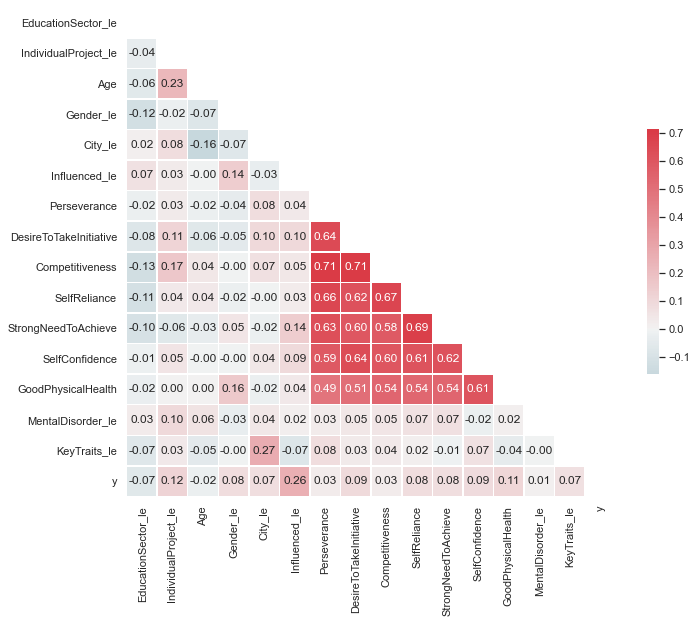

In [50]:
sns.set(style="white")
corr = data[corr_cols_1].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g=sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

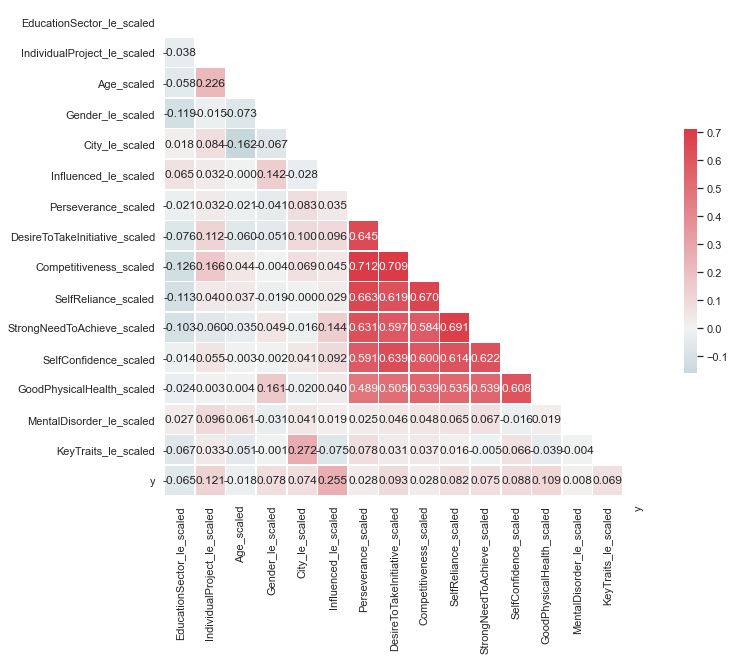

In [51]:
sns.set(style="white")
corr = data[corr_cols_2].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g=sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак классификации "y" наиболее сильно коррелирует с Influenced (0.26), по сравнению с другими признаками. Этот признак обязательно следует оставить в модели классификации.
- Целевой признак "Competitiveness" наиболее сильно коррелирует с "Perseverance" (0.712) и DesireToTakeInitiative (0.709),  поэтому не следует включать в модель "Competitiveness". 
- На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

## 5) Выбор метрик для последующей оценки качества моделей

В качестве метрик для решения задачи классификации будем использовать:
- Precision - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.
- Recall (полнота) - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.
- $F_1$-мера - для объединения precision и recall в единую метрику
- ROC AUC. Основана на вычислении следующих характеристик:
  - True Positive Rate, откладывается по оси ординат. Совпадает с recall.
  - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

In [52]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkturquoise',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [53]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

## 6) Выбор наиболее подходящих моделей для решения задачи классификации

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## 7) Формирование обучающей и тестовой выборок на основе исходного набора данных

In [54]:
# Признаки для задачи классификации
class_cols = ['Influenced_le',
               'DesireToTakeInitiative',
               'SelfConfidence',
               'GoodPhysicalHealth',
               ]

In [55]:
X = data[class_cols]
Y = data['y']
X.shape


(219, 4)

In [56]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [57]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((197, 4), (22, 4), (197,), (22,))

## 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки

In [72]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [73]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [74]:
def train_model(model_name, model, MetricLogger):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    precision = precision_score(Y_test.values, Y_pred)
    recall = recall_score(Y_test.values, Y_pred)
    f1 = f1_score(Y_test.values, Y_pred)
    roc_auc = roc_auc_score(Y_test.values, Y_pred)
    
    MetricLogger.add('precision', model_name, precision)
    MetricLogger.add('recall', model_name, recall)
    MetricLogger.add('f1', model_name, f1)
    MetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(Y_test.values, Y_pred)
    
    plot_confusion_matrix(model, X_test, Y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
LogisticRegression()
*****************************************************


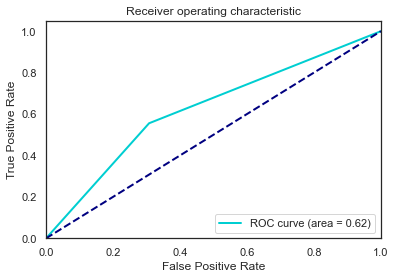

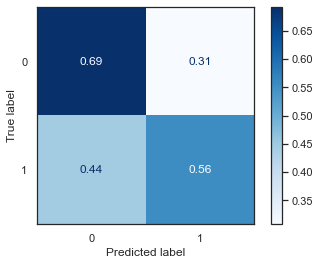

*****************************************************
KNeighborsClassifier()
*****************************************************


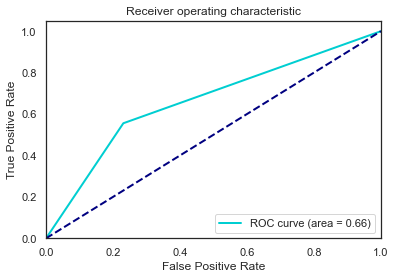

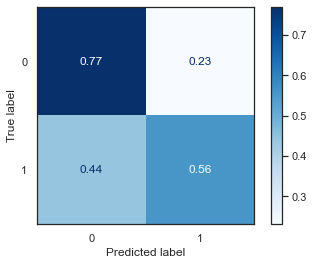

*****************************************************
SVC()
*****************************************************


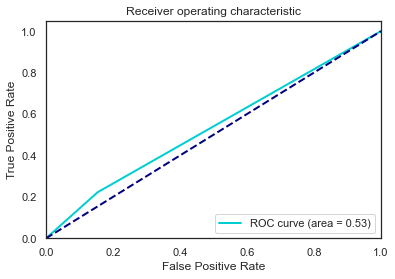

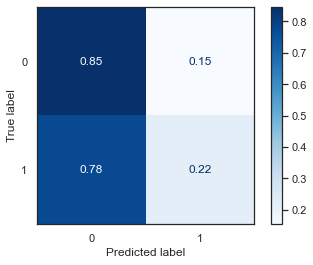

*****************************************************
DecisionTreeClassifier()
*****************************************************


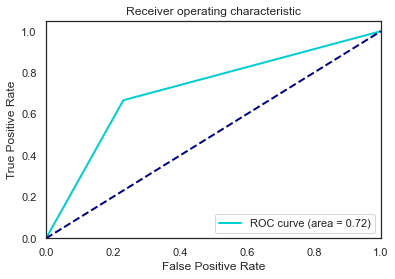

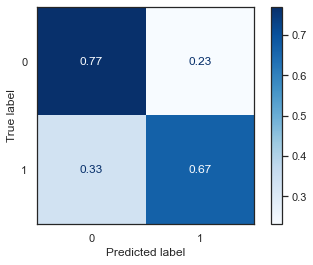

*****************************************************
RandomForestClassifier()
*****************************************************


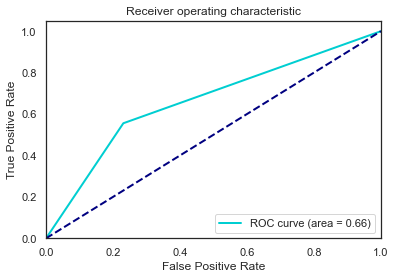

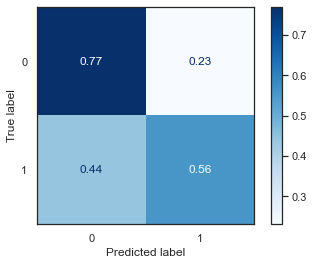

*****************************************************
GradientBoostingClassifier()
*****************************************************


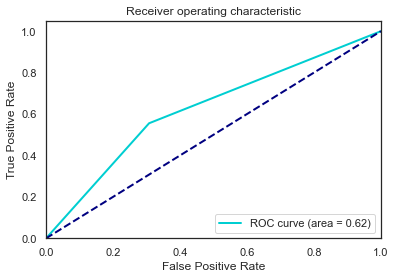

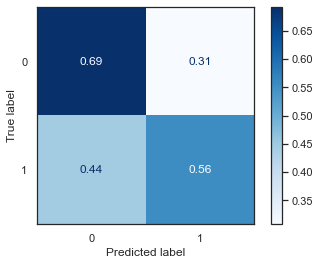

In [75]:
for model_name, model in clas_models.items():
    train_model(model_name, model, clasMetricLogger)

## 9) Подбор гиперпараметров для выбранных моделей

#### Метод ближайших соседей

In [76]:
n_range = np.array(range(1,100,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
         52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
         69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
         86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}]

In [77]:
gs_KNN = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
gs_KNN.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='roc_auc')

In [78]:
# Лучшая модель
gs_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [79]:
# Лучшее значение параметров
gs_KNN.best_params_

{'n_neighbors': 23}

In [80]:
clf_gs_best_params_txt = str(gs_KNN.best_params_['n_neighbors'])
clf_gs_best_params_txt

'23'

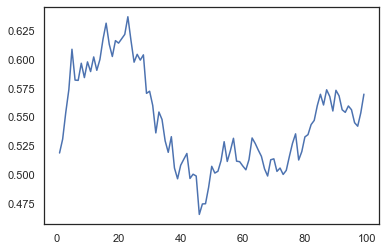

In [81]:
plt.plot(n_range, gs_KNN.cv_results_['mean_test_score'])

## 10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей

In [82]:
models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):gs_KNN.best_estimator_}

*****************************************************
KNeighborsClassifier()
*****************************************************


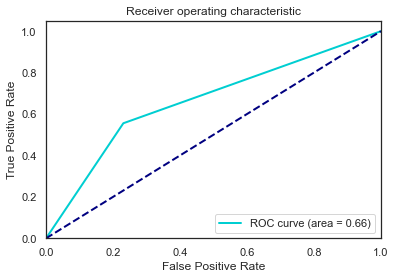

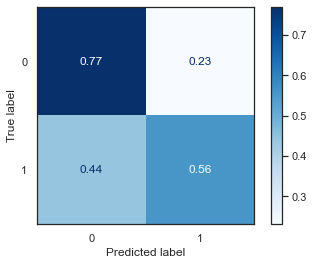

*****************************************************
KNeighborsClassifier(n_neighbors=23)
*****************************************************


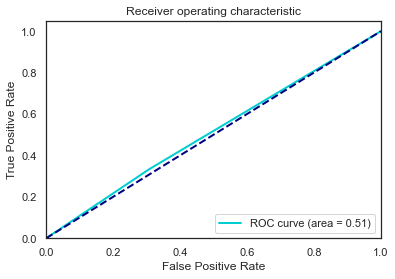

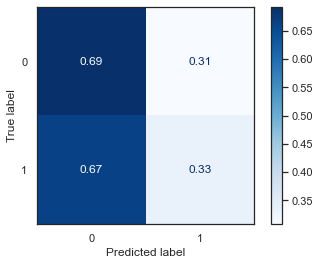

In [83]:
for model_name, model in models_grid.items():
    train_model(model_name, model, clasMetricLogger)

## 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик

In [84]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

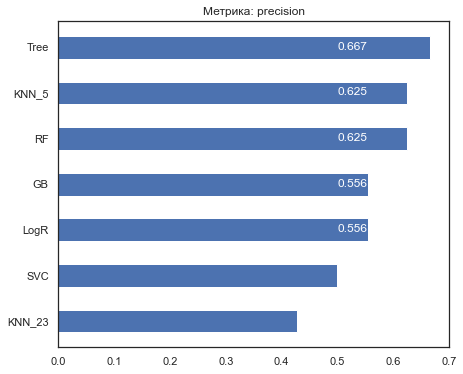

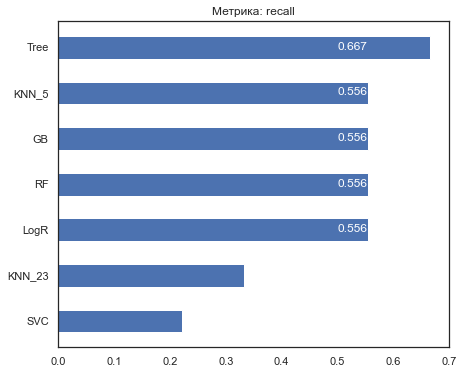

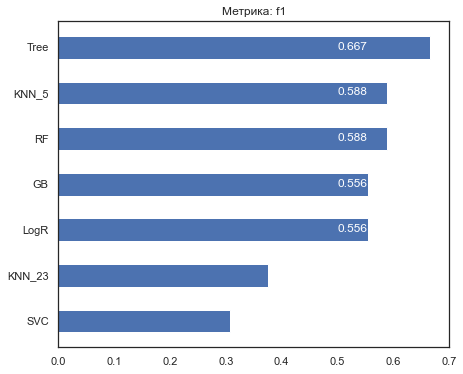

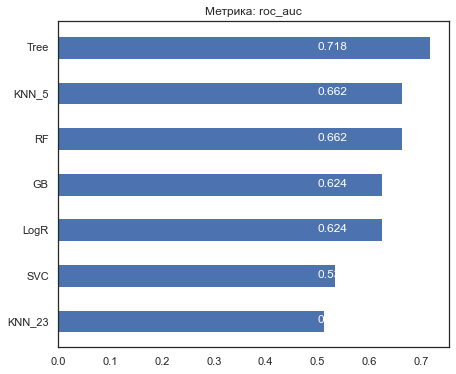

In [85]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Вывод: на основании метрик лучшей оказалась модель решающее дерево.